In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import sys 
sys.path.insert(1,"../src/")
from utils_OB import *
from scipy.signal import chirp
from _generate_time_series import *
from matplotlib.patches import Rectangle,ConnectionPatch
# import seaborn as sns
import seaborn as sns
# %matplotlib inline
sns.set_theme(context='paper', style = 'ticks', color_codes='deep')

# sns.set_palette('Spectral')
# sns.palplot(sns.color_palette())

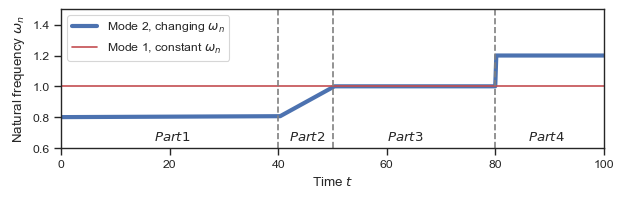

In [20]:
i=1000
t=np.linspace(0,100,i)
mode1=np.ones_like(t)

arr1=np.array([0.8]*400)
arr2=t[0:100]/50+0.8
arr3=np.array([1]*300)
arr4=np.array([1.2]*200)
mode2=np.hstack((arr1,arr2,arr3,arr4))
# print(mode2)
fig=plt.figure(figsize=(7,1.8))
axes=plt.subplot()
axes.plot(t,mode2,linewidth=3,label='Mode 2, changing $\omega_n$',color='b')
axes.plot(t,mode1,label='Mode 1, constant $\omega_n$',color='r')
axes.set_xlim(np.amin(t),np.amax(t))
axes.set_ylim(0.6,1.5)
axes.set_ylabel('Natural frequency $\omega_n$')
axes.set_xlabel('Time $t$')
axes.axvline(40,linestyle='--',color='grey')
axes.axvline(50,linestyle='--',color='grey')
axes.axvline(80,linestyle='--',color='grey')
axes.text(17,0.65,'$Part 1$')
axes.text(42,0.65,'$Part 2$')
axes.text(60,0.65,'$Part 3$')
axes.text(86,0.65,'$Part 4$')
axes.legend(loc='upper left')

plt.savefig(fname='mode_changing.png',dpi=400,bbox_inches='tight')
plt.show(fig)

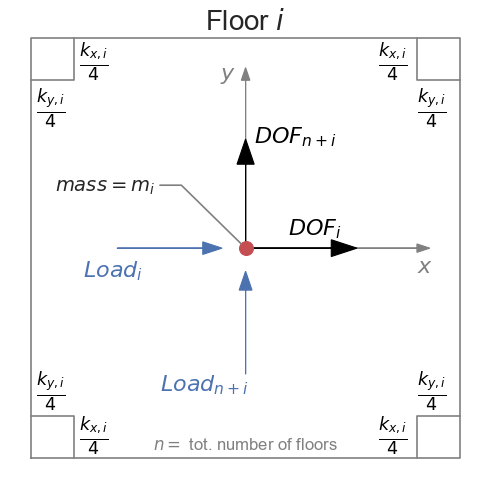

In [8]:
fig=plt.figure(figsize=(5,5))
axes=plt.subplot()
axes.plot([0,10,10,0,0],[0,0,10,10,0],color='grey')
axes.plot([9,9,10],[10,9,9],color='grey')
axes.plot([0,1,1],[1,1,0],color='grey')
axes.plot([9,9,10],[0,1,1],color='grey')
axes.plot([0,1,1],[9,9,10],color='grey')
axes.text(5,10.2,'Floor $i$',horizontalalignment='center',fontsize=20)

axes.plot([4.9,3.5,3],[5.1,6.5,6.5],color='grey')
axes.text(0.55,6.35,'$mass=m_{i}$',fontsize=14)

axes.arrow(5,5,0,4,linestyle='-',color='grey',head_width=0.2)
axes.arrow(5,5,4,0,linestyle='-',color='grey',head_width=0.2)
axes.text(4.4,9,'$y$',color='grey',fontsize=16)
axes.text(9,4.4,'$x$',color='grey',fontsize=16)

axes.arrow(5,5,0,2,linestyle='-',color='black',head_width=0.4)
axes.arrow(5,5,2,0,linestyle='-',color='black',head_width=0.4)
axes.text(5.2,7.5,'$DOF_{n+i}$',color='black',fontsize=16)
axes.text(6.0,5.3,'$DOF_{i}$',color='black',fontsize=16)

axes.arrow(5,2,0,2,linestyle='-',color='b',head_width=0.3)
axes.arrow(2,5,2,0,linestyle='-',color='b',head_width=0.3)
axes.text(1.2,4.3,'$Load_{i}$',color='b',fontsize=16)
axes.text(3,1.6,'$Load_{n+i}$',color='b',fontsize=16)

axes.text(1.1,0.3,r'$\frac{k_{x,i}}{4}$',color='black',fontsize=18)
axes.text(8.1,0.3,r'$\frac{k_{x,i}}{4}$',color='black',fontsize=18)
axes.text(1.1,9.2,r'$\frac{k_{x,i}}{4}$',color='black',fontsize=18)
axes.text(8.1,9.2,r'$\frac{k_{x,i}}{4}$',color='black',fontsize=18)

axes.text(0.1,1.35,r'$\frac{k_{y,i}}{4}$',color='black',fontsize=18)
axes.text(9,1.35,r'$\frac{k_{y,i}}{4}$',color='black',fontsize=18)
axes.text(0.1,8.1,r'$\frac{k_{y,i}}{4}$',color='black',fontsize=18)
axes.text(9,8.1,r'$\frac{k_{y,i}}{4}$',color='black',fontsize=18)




axes.text(5,0.2,'$n =$ tot. number of floors',horizontalalignment='center',color='grey',fontsize=12)


axes.scatter(5,5,color='r',s=100)
axes.set_axis_off()
plt.tight_layout()
plt.savefig(fname='floor_plan.png',dpi=200)


Load:

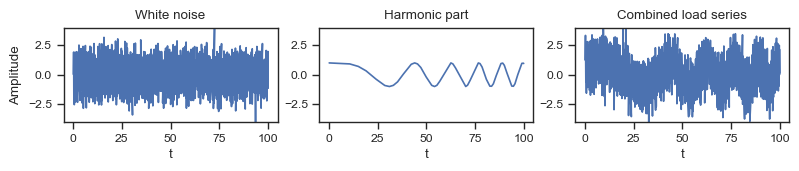

In [5]:
fig =plt.figure(figsize=(8,1.8))
t=np.linspace(0,100,5000)
load=load_series(t)
load.create_load(1,None,0,1,5)
axes1=plt.subplot2grid((1,3),(0,0))
axes1.plot(t,load.F)
axes1.set_ylim(-4,4)
axes1.set_title('White noise')
axes1.set_xlabel('t')
axes1.set_ylabel('Amplitude')

axes2=plt.subplot2grid((1,3),(0,1))
F2=chirp(t,0.001,t[-1],0.1)*1
axes2.plot(t,F2)
axes2.set_ylim(-4,4)
axes2.set_title('Harmonic part')
axes2.set_xlabel('t')

axes3=plt.subplot2grid((1,3),(0,2))
load3=load_series(t)
load3.create_load(1,'decreasing',1,0.00628,0.628)
axes3.plot(t,load3.F)
axes3.set_ylim(-4,4)
axes3.set_title('Combined load series')
axes3.set_xlabel('t')

plt.tight_layout()

plt.savefig(fname='load_series.png',dpi=300)
plt.show(fig)

In [6]:
t=np.array([np.linspace(1,100,10000),np.linspace(1,100,10000)*2])

U1=np.random.rand(2,np.shape(t)[1])*2-1

U1=np.sin(t*20)
dU1=U1/10
ddU1=U1/100

U2=U1
dU2=U2/10
ddU2=U2/100

UU1=[U1,dU1,ddU1]
UU2=[U2,dU2,ddU2]

responses=[UU1,UU2]
noised_resp=add_noise_response(responses,1)


U1_n=noised_resp[1][0]
dU1_n=noised_resp[1][1]
ddU1_n=noised_resp[1][2]



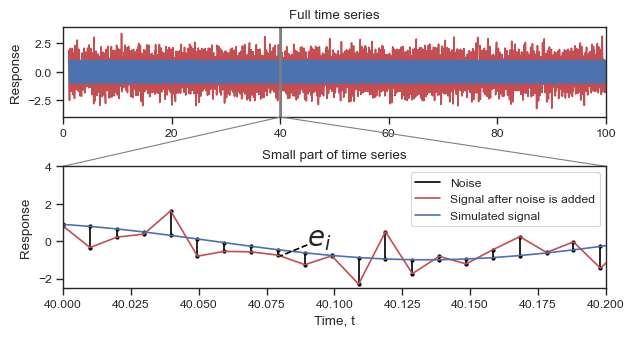

In [13]:
Fig=plt.figure(figsize=(7,4))

l=0.2

ax1=plt.subplot2grid((3,1),[0,0],1,1,fig=Fig)
ax1.plot(t[0],U1_n[0],label='noised',color='r')
ax1.plot(t[0],U2[0],label='signal',color='b')
ax1.axvline(40,color='grey',linestyle='-')
ax1.axvline(40+l,color='grey',linestyle='-')

ax1.add_patch(Rectangle((40, -4), l, 8, fill=True,color='grey', hatch='/'))
# ax1.axis('equal')
ax1.set_xlim(0,100)
ax1.set_ylim(-4,4)
ax1.set_title('Full time series')
# ax1.set_xlabel('Time, t')
ax1.set_ylabel('Response')


ax2=plt.subplot2grid((20,1),[9,0],8,1,fig=Fig)
for i in range(3920,4000):
    if i==3998:
        ax2.plot([t[0,i]]*2,[U1_n[0,i],U1[0,i]],color='black',label='Noise')
    else:     
        ax2.plot([t[0,i]]*2,[U1_n[0,i],U1[0,i]],color='black')



ax2.plot(t[0],U1_n[0],label='Signal after noise is added',color='r')
ax2.plot(t[0],U2[0],label='Simulated signal',color='b')

ax2.scatter(t[0],U1_n[0],s=5,c='black')
ax2.scatter(t[0],U2[0],s=5,c='black')

ax2.set_xlim(40,40+l)
ax2.set_ylim(-2.5,4)

xyA=[40,ax1.get_ylim()[0]]
xyB=[40,ax2.get_ylim()[1]]
con = ConnectionPatch(xyA=xyA, xyB=xyB, coordsA="data", coordsB="data",
                      axesA=ax1, axesB=ax2, color="grey")
ax2.add_artist(con)

xyA2=[40+l,ax1.get_ylim()[0]]
xyB2=[ax2.get_xlim()[1],ax2.get_ylim()[1]]
con = ConnectionPatch(xyA=xyA2, xyB=xyB2, coordsA="data", coordsB="data",
                      axesA=ax1, axesB=ax2, color="grey")
ax2.add_artist(con)

ax2.text(40.090,-0.2,'$e_i$',fontsize=20)
ax2.plot([40.090,40.080],[-0.2,-0.8],color='black',linestyle='--')

ax2.set_title('Small part of time series')
ax2.set_xlabel('Time, t')
ax2.set_ylabel('Response')




plt.legend(loc='upper right')

plt.savefig(fname='load_series_noised.png',dpi=400)
plt.show(Fig)
